In [6]:
#Performing Analysis Of Meteorological Data


In [7]:
pwd

'C:\\Users\\MUMMIDI\\1.Internship answers'

In [ ]:
#Importing the Necessary Libraries & Data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [8]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [10]:
#Data cleaning


In [11]:
#Find all Missing values from the Dataset and fill them Accordingly



In [15]:
print(df.isnull().sum())  #Seems 'Percip Type' has 517, filling 'NaN' to remove anamolies.
df = df.fillna(df['Precip Type'].value_counts().index[0])

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
#Change the format of data for better analysis

In [17]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [18]:
#Change the datatype of the 'Formatted Date' column to datetime

In [19]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc = True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
5       2006-04-01 03:00:00+00:00
6       2006-04-01 04:00:00+00:00
7       2006-04-01 05:00:00+00:00
8       2006-04-01 06:00:00+00:00
9       2006-04-01 07:00:00+00:00
10      2006-04-01 08:00:00+00:00
11      2006-04-01 09:00:00+00:00
12      2006-04-01 10:00:00+00:00
13      2006-04-01 11:00:00+00:00
14      2006-04-01 12:00:00+00:00
15      2006-04-01 13:00:00+00:00
16      2006-04-01 14:00:00+00:00
17      2006-04-01 15:00:00+00:00
18      2006-04-01 16:00:00+00:00
19      2006-04-01 17:00:00+00:00
20      2006-04-01 18:00:00+00:00
21      2006-04-01 19:00:00+00:00
22      2006-04-01 20:00:00+00:00
23      2006-04-01 21:00:00+00:00
24      2006-04-09 22:00:00+00:00
25      2006-04-09 23:00:00+00:00
26      2006-04-10 00:00:00+00:00
27      2006-04-10 01:00:00+00:00
28      2006-04-10 02:00:00+00:00
29      2006-0

In [20]:
#Change 'Formatted Date' column type from object to standard python datetime
df.dtypes['Formatted Date']

datetime64[ns, UTC]

In [21]:
# Resample data from hourly to month wise
df=df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [24]:
df_monthly_mean = df[['Apparent Temperature (C)', 'Humidity']].resample('M').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


In [25]:
#Step 4: Analysis plots of temperature & humidity over the range of years in the dataset


In [26]:
#4.1 Variation in apparent temperature & humidity with time (in years)


(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text yticklabel objects>)

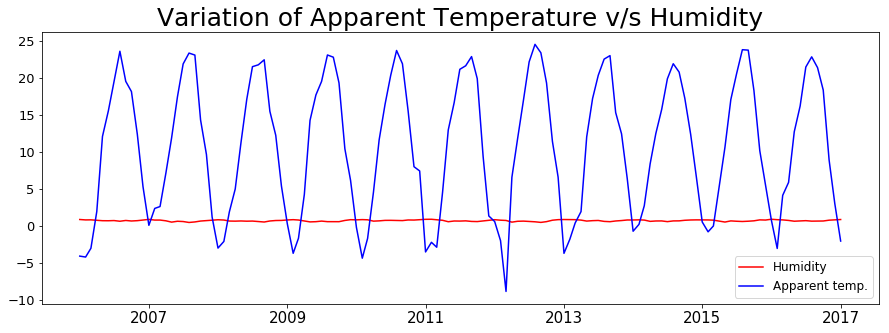

In [29]:
plt.figure(figsize = (15,5));
plt.plot(df_monthly_mean['Humidity'],label = 'Humidity',color='red');
plt.plot(df_monthly_mean['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'blue');
plt.title("Variation of Apparent Temperature v/s Humidity", fontsize=25);
plt.legend(loc = 0,fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13)

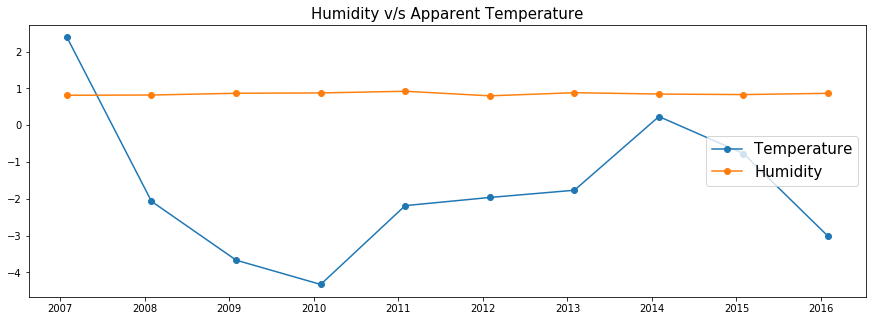

In [35]:
January = df_monthly_mean[df_monthly_mean.index.month==1]
plt.figure(figsize = (15,5));
plt.plot(January.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(January.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



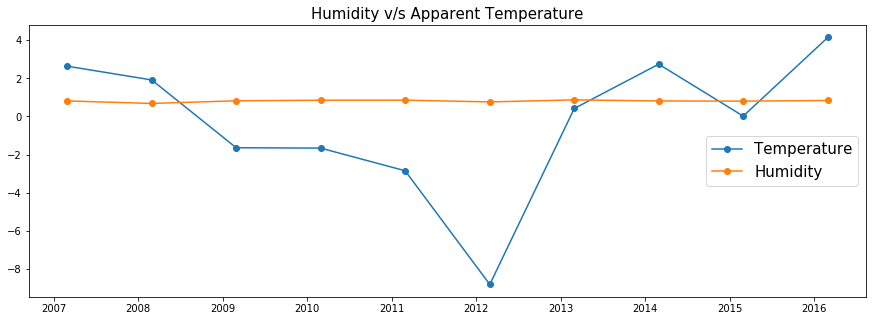

In [36]:
February = df_monthly_mean[df_monthly_mean.index.month==2]
plt.figure(figsize = (15,5));
plt.plot(February.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(February.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



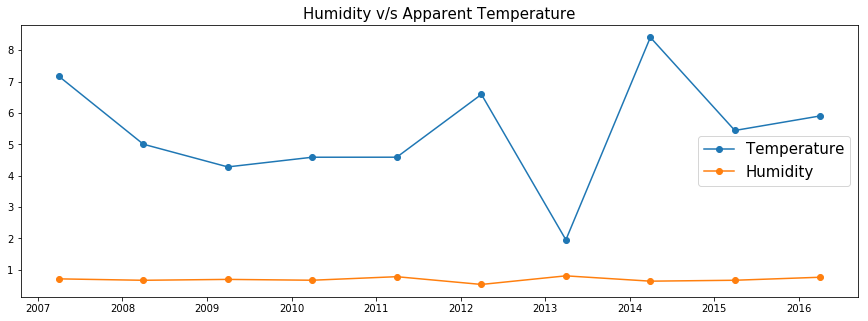

In [44]:
March = df_monthly_mean[df_monthly_mean.index.month==3]
plt.figure(figsize = (15,5));
plt.plot(March.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(March.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



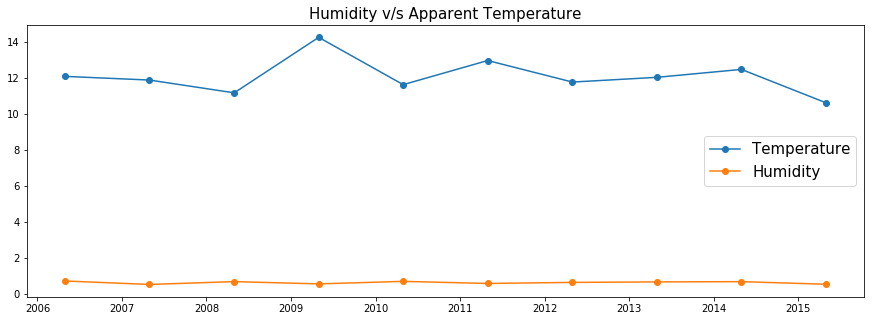

In [42]:
April = df_monthly_mean[df_monthly_mean.index.month==4]
plt.figure(figsize = (15,5));
plt.plot(April.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(April.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



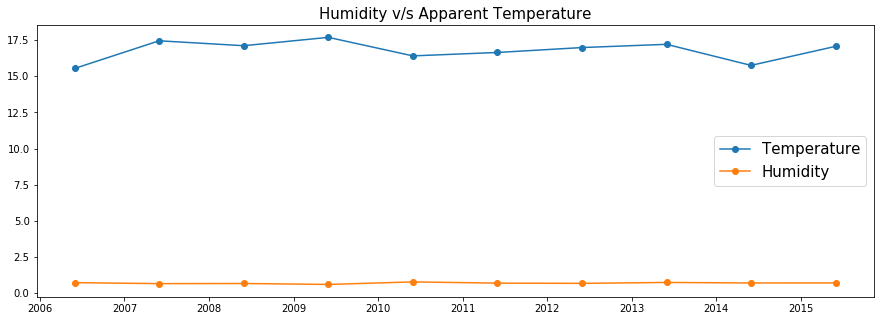

In [43]:
May = df_monthly_mean[df_monthly_mean.index.month==5]
plt.figure(figsize = (15,5));
plt.plot(May.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(May.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



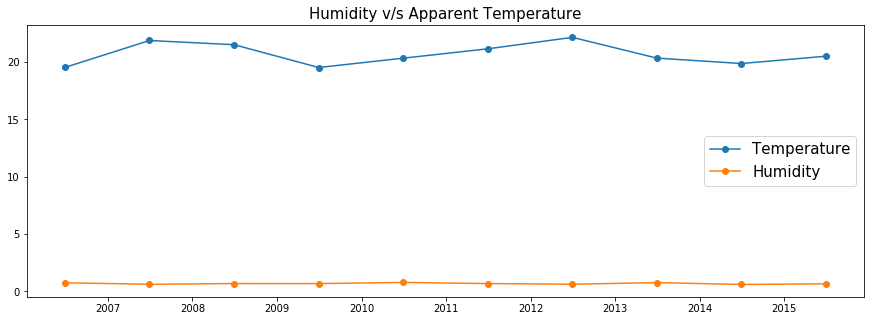

In [45]:
June = df_monthly_mean[df_monthly_mean.index.month==6]
plt.figure(figsize = (15,5));
plt.plot(June.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(June.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



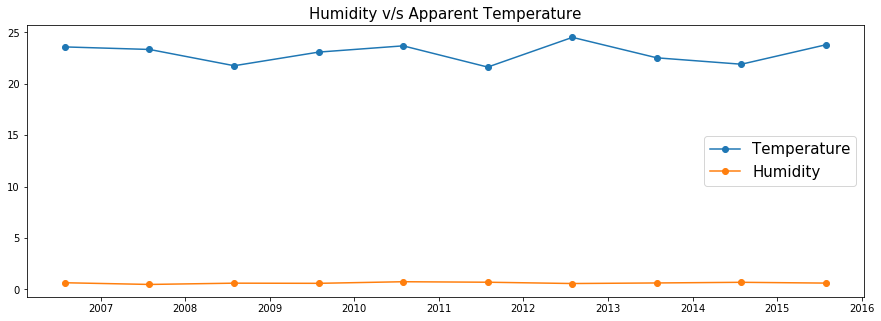

In [46]:
July = df_monthly_mean[df_monthly_mean.index.month==7]
plt.figure(figsize = (15,5));
plt.plot(July.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(July.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



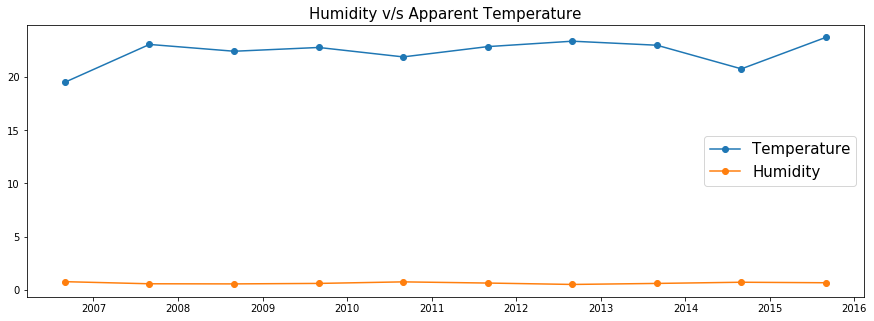

In [47]:
August = df_monthly_mean[df_monthly_mean.index.month==8]
plt.figure(figsize = (15,5));
plt.plot(August.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(August.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



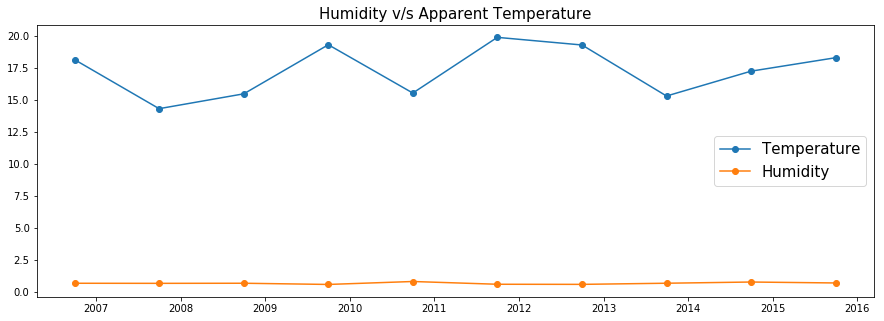

In [48]:
September = df_monthly_mean[df_monthly_mean.index.month==9]
plt.figure(figsize = (15,5));
plt.plot(September.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(September.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



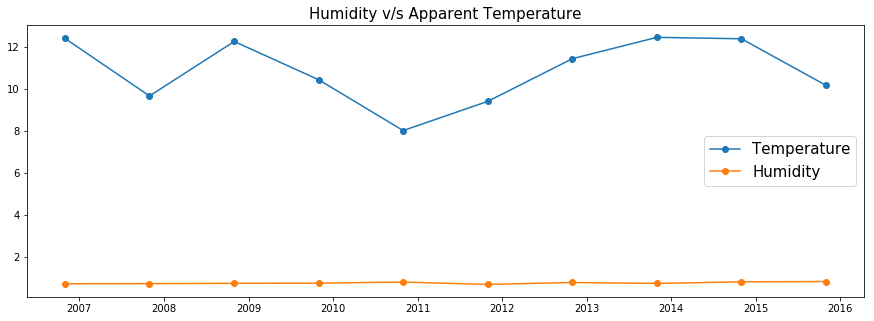

In [49]:
October = df_monthly_mean[df_monthly_mean.index.month==10]
plt.figure(figsize = (15,5));
plt.plot(October.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(October.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



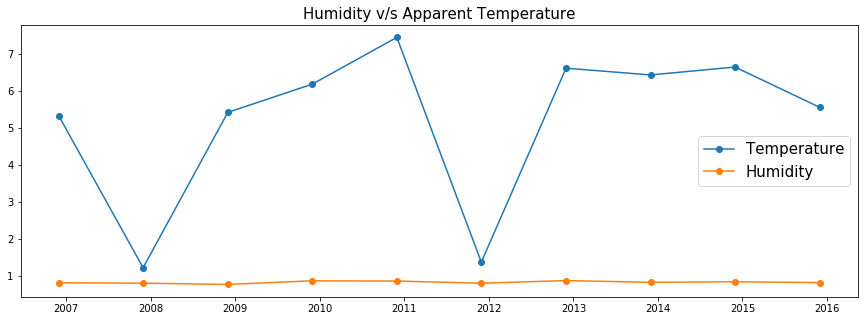

In [50]:
November = df_monthly_mean[df_monthly_mean.index.month==11]
plt.figure(figsize = (15,5));
plt.plot(November.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(November.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);



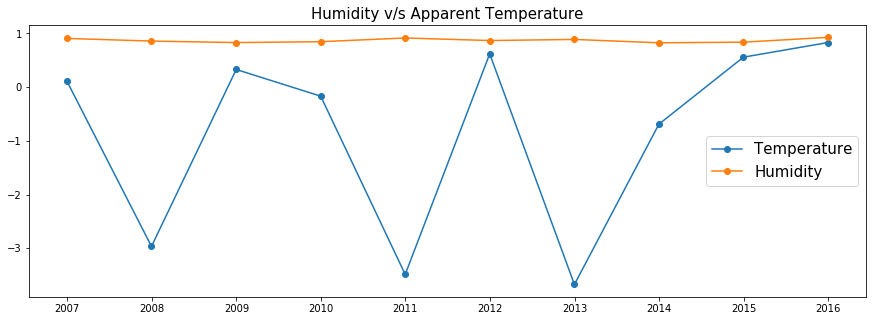

In [51]:
December = df_monthly_mean[df_monthly_mean.index.month==12]
plt.figure(figsize = (15,5));
plt.plot(December.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker='o',linestyle='-',label='Temperature');
plt.plot(December.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity');
plt.legend(loc = 'center right',fontsize = 15);
plt.title("Humidity v/s Apparent Temperature", fontsize=15);

